In [124]:
from cmdstanpy import CmdStanModel

from seaborn import jointplot
import arviz as az
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import pandas as pd

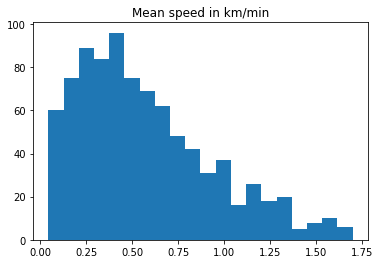

1    306
4    265
3    217
2     89
Name: Road_traffic_density, dtype: int64

In [125]:
df = pd.read_csv('delivery_time_data.csv', delimiter=';', decimal=',')

df = df[df["Road distances [km]"] < 17.5]

# display(df.describe())

train_df = pd.DataFrame(df.iloc[:1000, :])
train_df["Mean speed"] = train_df["Road distances [km]"] / (train_df["Time_taken(min)"] - train_df["Meal_preparation_time"]) 
train_df = train_df[train_df["Mean speed"] < 1.7]
plt.hist(train_df["Mean speed"], bins=20)
plt.title("Mean speed in km/min")
plt.show()
# display(train_df["Road_traffic_density"].value_counts())
# plt.title("Count of density type")
# plt.show()

# train_df["Mean speed"].describe()
# train_df["Time_taken(min)"].describe()
# train_df.head()

road_density_map = {'Jam ':1, 'High ':2, 'Medium ':3, 'Low ':4}

train_df["Road_traffic_density"] = train_df["Road_traffic_density"].apply(lambda x: road_density_map[x])
display(train_df["Road_traffic_density"].value_counts())


INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing



chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


count    877.000000
mean       0.187098
std        0.054962
min        0.110502
25%        0.128260
50%        0.207828
75%        0.242562
max        0.264270
Name: 0, dtype: float64

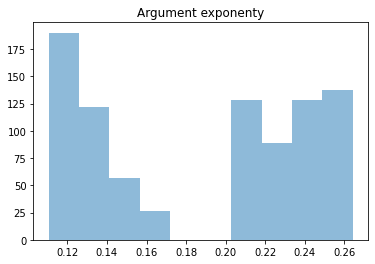

count    877.000000
mean       6.001867
std        6.536443
min        0.004415
25%        1.654550
50%        3.903070
75%        7.934310
max       58.966500
Name: 0, dtype: float64

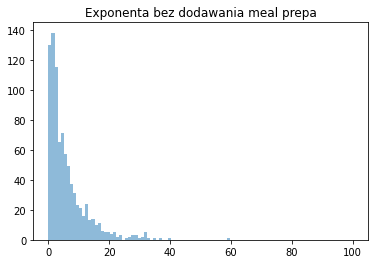

count    877.000000
mean      20.185453
std        8.963897
min        7.627710
25%       13.454700
50%       18.787100
75%       25.446900
max       63.202600
Name: 0, dtype: float64

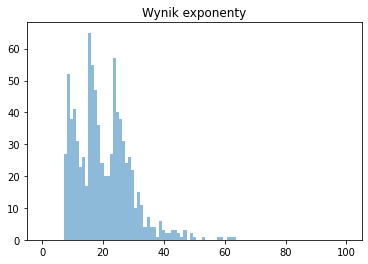

Odchylenie =  [[1.54846]]


count     877.000000
mean      203.405548
std       194.333375
min        24.265400
25%        75.500300
50%       147.204000
75%       270.065000
max      1665.980000
Name: 0, dtype: float64

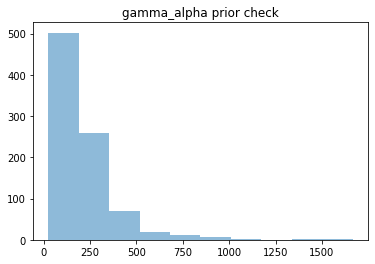

count    877.000000
mean       8.418555
std        3.738487
min        3.181220
25%        5.611430
50%        7.835370
75%       10.612900
max       26.359300
Name: 0, dtype: float64

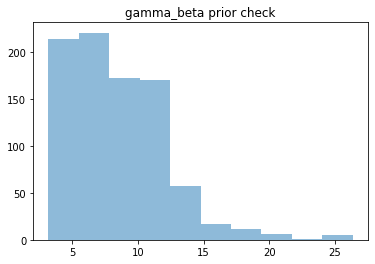

count    877.000000
mean      20.187483
std        9.092291
min        4.228790
25%       13.451800
50%       18.839700
75%       25.516100
max       63.385800
Name: 0, dtype: float64


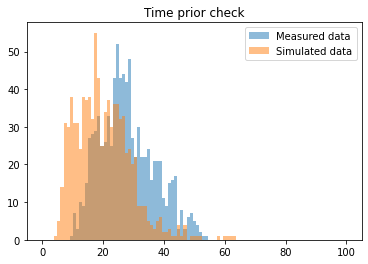

distance_coef    distance_coeff
0        0.001625


In [126]:
model_ppc=CmdStanModel(stan_file='basic_ppc.stan')

sim=model_ppc.sample(data={"N": len(train_df), "distance": train_df["Road distances [km]"].values,"meal_preparation_time": train_df["Meal_preparation_time"].values,"traffic_level" :train_df["Road_traffic_density"].values}, 
                     iter_sampling=1,
                     iter_warmup=0, 
                     chains=1, 
                     fixed_param=True,
                     seed=29042020)
ppc_df = sim.draws_pd()

bins = np.linspace(0,100,100)

# speed_bins = np.linspace(0,2.5,100)
# speed = ppc_df.filter(regex="speed.*")
# plt.hist(train_df["Mean speed"],bins=speed_bins ,alpha=0.5, label="Measured data")
# plt.hist(speed.values.flatten(),bins=speed_bins, alpha=0.5, label="Simulated data")
# plt.title("Speed prior check")
# plt.legend()
# plt.show()

mean_for_gamma = ppc_df.filter(regex="temp1.*")

delivery = ppc_df.filter(regex="delivery_time.*")
display(mean_for_gamma.iloc[0,:].describe())
# delivery.iloc[:,:].apply(pd.DataFrame.describe, axis=1)
# delivery['value'].describe()
# display(speed.loc[0,:].min())
plt.hist(mean_for_gamma.values.flatten(), alpha=0.5, label="Mu")
plt.title("Argument exponenty")
plt.show()

mean_for_gamma = ppc_df.filter(regex="temp2.*")

delivery = ppc_df.filter(regex="delivery_time.*")
display(mean_for_gamma.iloc[0,:].describe())
# delivery.iloc[:,:].apply(pd.DataFrame.describe, axis=1)
# delivery['value'].describe()
# display(speed.loc[0,:].min())
plt.hist(mean_for_gamma.values.flatten(), bins=bins, alpha=0.5, label="Mu")
plt.title("Exponenta bez dodawania meal prepa")
plt.show()

mean_for_gamma1 = ppc_df.filter(regex="mu.*")

# delivery = ppc_df.filter(regex="delivery_time.*")
display(mean_for_gamma1.iloc[0,:].describe())
# delivery.iloc[:,:].apply(pd.DataFrame.describe, axis=1)
# delivery['value'].describe()
# display(speed.loc[0,:].min())
plt.hist(mean_for_gamma1.values.flatten(),bins=bins, alpha=0.5, label="Mu")
plt.title("Wynik exponenty")
plt.show()

sigma = ppc_df.filter(regex="sigma.*")
print(f"Odchylenie =  {sigma.values}")

mean_for_gamma2 = ppc_df.filter(regex="gamma_alpha.*")
# delivery = ppc_df.filter(regex="delivery_time.*")
display(mean_for_gamma2.iloc[0,:].describe())
# delivery.iloc[:,:].apply(pd.DataFrame.describe, axis=1)
# delivery['value'].describe()
# display(speed.loc[0,:].min())
plt.hist(mean_for_gamma2.values.flatten(), alpha=0.5, label="Mu")
plt.title("gamma_alpha prior check")
plt.show()

mean_for_gamma3 = ppc_df.filter(regex="gamma_beta.*")
# delivery = ppc_df.filter(regex="delivery_time.*")
display(mean_for_gamma3.iloc[0,:].describe())
# delivery.iloc[:,:].apply(pd.DataFrame.describe, axis=1)
# delivery['value'].describe()
# display(speed.loc[0,:].min())
plt.hist(mean_for_gamma3.values.flatten(), alpha=0.5, label="Mu")
plt.title("gamma_beta prior check")
plt.show()

print(delivery.iloc[0,:].describe())
plt.hist(train_df["Time_taken(min)"],bins=bins ,alpha=0.5, label="Measured data")
plt.hist(delivery.values.flatten(),bins=bins, alpha=0.5, label="Simulated data")
plt.title("Time prior check")
plt.legend()
plt.show()


print(f"distance_coef {ppc_df.filter(regex='distance_coeff.*')}")


## Model fit

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing



chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,distance_coeff_raw,traffic_level_coeff[1],traffic_level_coeff[2],traffic_level_coeff[3],traffic_level_coeff[4],meal_prep_coeff,sigma,travel_time[1],...,exp_argument[868],exp_argument[869],exp_argument[870],exp_argument[871],exp_argument[872],exp_argument[873],exp_argument[874],exp_argument[875],exp_argument[876],exp_argument[877]
0,0.0,0.0,0.001563,0.004883,0.020072,0.020587,0.012063,1.34488,0.731476,10.43,...,0.02675,0.029758,0.015371,0.042808,0.011092,0.026604,0.02821,0.008459,0.037975,0.007967


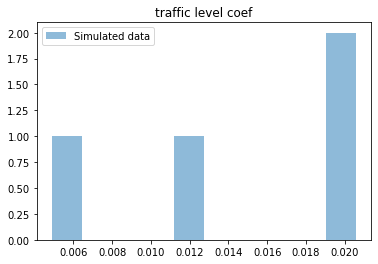

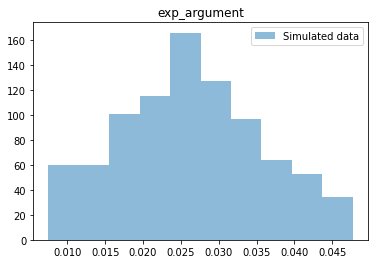

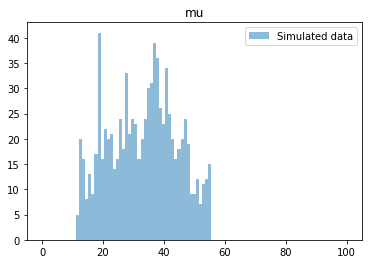

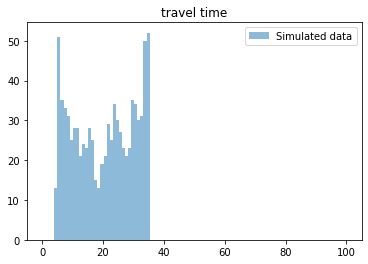

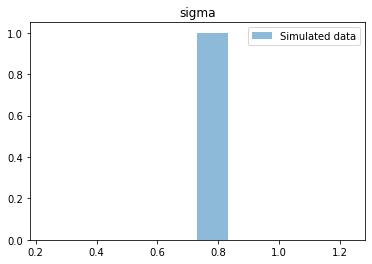

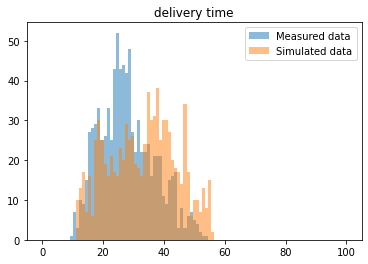

meal_prep_ceof    meal_prep_coeff
0          1.34488
distance_coef    distance_coeff_raw  distance_coeff
0            0.001563        0.001563


In [127]:
basic_fit=CmdStanModel(stan_file='basic_fit.stan')

basic_sample=basic_fit.sample(data={"N": len(train_df), "distance": train_df["Road distances [km]"].values,"meal_preparation_time": train_df["Meal_preparation_time"].values, "delivery_times": train_df["Time_taken(min)"].values, "traffic_level" :train_df["Road_traffic_density"].values},
                              iter_sampling=1,
                              chains=1,
                              iter_warmup=0,
                              fixed_param=True,
                         )


df_fit = basic_sample.draws_pd()
display(df_fit.head())


traffib_level = df_fit.filter(regex="traffic_level_coef.*")
# df_fit.iloc[:, 8:]
# plt.hist(train_df["Time_taken(min)"], bins=bins, alpha=0.5, label="Measured data")
plt.hist(traffib_level.values.flatten(), alpha=0.5, label="Simulated data")
plt.title("traffic level coef")
plt.legend()
plt.show()

epx_argument = df_fit.filter(regex="exp_argument.*")
# df_fit.iloc[:, 8:]
# plt.hist(train_df["Time_taken(min)"], bins=bins, alpha=0.5, label="Measured data")
plt.hist(epx_argument.values.flatten(), alpha=0.5, label="Simulated data")
plt.title("exp_argument")
plt.legend()
plt.show()

mu = df_fit.filter(regex="mu.*")
# df_fit.iloc[:, 8:]
# plt.hist(train_df["Time_taken(min)"], bins=bins, alpha=0.5, label="Measured data")
plt.hist(mu.values.flatten(),bins=bins, alpha=0.5, label="Simulated data")
plt.title("mu")
plt.legend()
plt.show()

travel_time = df_fit.filter(regex="travel_time.*")
# df_fit.iloc[:, 8:]
# plt.hist(train_df["Time_taken(min)"], bins=bins, alpha=0.5, label="Measured data")
plt.hist(travel_time.values.flatten(),bins=np.linspace(0,100,100), alpha=0.5, label="Simulated data")
plt.title("travel time")
plt.legend()
plt.show()

sigma = df_fit.filter(regex="sigma.*")
# df_fit.iloc[:, 8:]
# plt.hist(train_df["Time_taken(min)"], bins=bins, alpha=0.5, label="Measured data")
plt.hist(sigma.values.flatten(), alpha=0.5, label="Simulated data")
plt.title("sigma")
plt.legend()
plt.show()



delivery_fit = df_fit.filter(regex="delivery_time.*")
# df_fit.iloc[:, 8:]
plt.hist(train_df["Time_taken(min)"], bins=bins, alpha=0.5, label="Measured data")
plt.hist(delivery_fit.values.flatten(),bins=bins, alpha=0.5, label="Simulated data")
plt.title("delivery time")
plt.legend()
plt.show()

print(f"meal_prep_ceof {df_fit.filter(regex='meal_prep_coef.*')}")
print(f"distance_coef {df_fit.filter(regex='distance_coeff.*')}")